In [1]:
#Adecuación de Datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Evaluación del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

#Evaluación de parametros
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

import numpy as np
from sklearn.tree import plot_tree

#Adecuación de Datos

In [2]:
#importar los datos
file = pd.read_excel('/content/data.xlsx')
df = pd.DataFrame(file)
#Eliminar columnas
df=df.drop(['timeStamp','label','responseMessage', 'dataType', 'URL', 'IdleTime', 'failureMessage','grpThreads', 'threadName'], axis=1)
#converción columna success
success_dict = {True:1,False:0}
df = df.applymap(lambda s: success_dict.get(s) if s in success_dict else s)
df[["success"]] = df[["success"]].apply(pd.to_numeric)
#renombrar columnas
df = df.rename(columns={'elapsed':'VO','responseCode':'V1','success':'V2','bytes':'V3','sentBytes':'V4','allThreads':'V5', 'Latency':'V6','Connect':'V7','Result':'V8'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712409 entries, 0 to 712408
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   VO      712409 non-null  int64
 1   V1      712409 non-null  int64
 2   V2      712409 non-null  int64
 3   V3      712409 non-null  int64
 4   V4      712409 non-null  int64
 5   V5      712409 non-null  int64
 6   V6      712409 non-null  int64
 7   V7      712409 non-null  int64
 8   V8      712409 non-null  int64
dtypes: int64(9)
memory usage: 48.9 MB


In [4]:
df.head()

,VO,V1,V2,V3,V4,V5,V6,V7,V8
0,734,200,1,1064,200,1,734,95,1
1,783,200,1,1065,202,1,783,66,1
2,358,200,1,7566,201,1,358,108,1
3,620,200,1,1054,201,1,620,119,1
4,331,200,1,1067,205,1,331,74,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

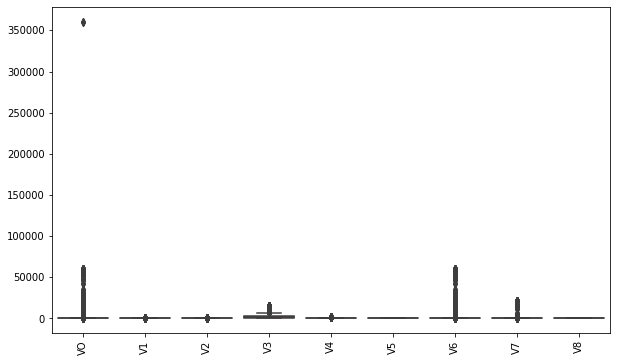

In [5]:
#Graficos Datos sin normalizar

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)

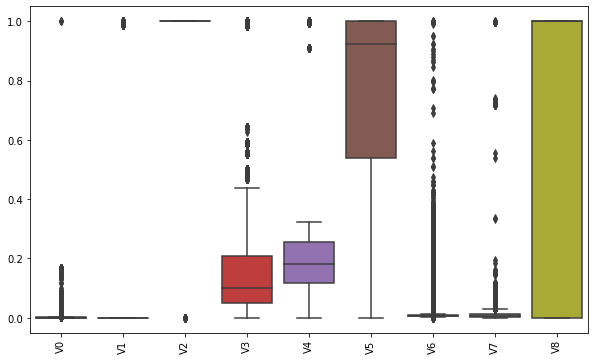

In [3]:
#Normalizar datos
columnas = ['V0','V1','V2','V3','V4','V5','V6','V7','V8']
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df.iloc[:, :9])
df_norm = pd.DataFrame(df_norm, columns=columnas)
#Graficos Datos normalizados
plt.figure(figsize=(10,6))
sns.boxplot(data=df_norm)
plt.xticks(rotation=90)
#Divición de datos
X = df_norm.iloc[:,0:8]
Y = df_norm.iloc[:,8:]
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        Y,
                                        train_size   = 0.75,
                                        random_state = 1324,
                                        shuffle      = True
)

In [7]:
df_norm

,V0,V1,V2,V3,V4,V5,V6,V7,V8
0,0.001589,0.0,1.0,0.058224,0.117371,0.0,0.012129,0.002615,1.0
1,0.001725,0.0,1.0,0.058290,0.118545,0.0,0.012939,0.001236,1.0
2,0.000544,0.0,1.0,0.485510,0.117958,0.0,0.005916,0.003233,1.0
3,0.001272,0.0,1.0,0.057567,0.117958,0.0,0.010245,0.003756,1.0
4,0.000469,0.0,1.0,0.058422,0.120305,0.0,0.005470,0.001616,1.0
...,...,...,...,...,...,...,...,...,...
712404,0.000969,0.0,1.0,0.153184,0.092723,0.0,0.008444,0.006418,1.0
712405,0.000536,0.0,1.0,0.153184,0.092723,0.0,0.005866,0.006941,1.0
712406,0.000539,0.0,1.0,0.153118,0.092723,0.0,0.005883,0.006085,1.0
712407,0.000417,0.0,1.0,0.153118,0.092723,0.0,0.005139,0.005990,1.0


In [8]:
X_train

,V0,V1,V2,V3,V4,V5,V6,V7
208750,0.000878,0.0,1.0,0.403233,0.142019,0.615385,0.007899,0.001569
556500,0.000672,0.0,1.0,0.097917,0.994718,1.000000,0.006676,0.006228
385683,0.001616,0.0,1.0,0.228166,0.255282,0.615385,0.012212,0.027573
192587,0.000667,0.0,1.0,0.403233,0.142019,1.000000,0.006643,0.001854
427786,0.000839,0.0,1.0,0.036472,0.255282,0.076923,0.007668,0.014405
...,...,...,...,...,...,...,...,...
598361,0.000392,0.0,1.0,0.117566,0.910211,0.307692,0.005007,0.006323
377972,0.002522,0.0,1.0,0.089571,0.226526,1.000000,0.017682,0.014595
219935,0.000753,0.0,1.0,0.403233,0.142019,1.000000,0.007155,0.001474
261842,0.000725,0.0,1.0,0.551160,0.162559,1.000000,0.006990,0.001379


In [9]:
X_test

,V0,V1,V2,V3,V4,V5,V6,V7
148394,0.000653,0.0,1.0,0.011960,0.109742,0.384615,0.006560,0.002329
697492,0.003225,0.0,1.0,0.153184,0.092723,1.000000,0.021846,0.053910
704419,0.000367,0.0,1.0,0.153053,0.092723,1.000000,0.004858,0.005182
660985,0.000322,0.0,1.0,0.117500,0.910211,0.153846,0.004594,0.005942
400324,0.001025,0.0,1.0,0.225340,0.255282,1.000000,0.008775,0.018065
...,...,...,...,...,...,...,...,...
115717,0.000767,0.0,1.0,0.014063,0.132629,0.000000,0.007238,0.001426
281002,0.000817,0.0,1.0,0.501807,0.162559,0.923077,0.007535,0.002947
518608,0.001522,0.0,1.0,0.050930,0.180164,1.000000,0.011733,0.002852
563992,0.000569,0.0,1.0,0.097983,0.994718,0.846154,0.006065,0.006465


In [10]:
y_train

,V8
208750,1.0
556500,1.0
385683,0.0
192587,1.0
427786,0.0
...,...
598361,1.0
377972,0.0
219935,1.0
261842,1.0


In [11]:
y_test

,V8
148394,1.0
697492,1.0
704419,1.0
660985,1.0
400324,0.0
...,...
115717,1.0
281002,1.0
518608,0.0
563992,1.0


#Evaluación del modelo

In [4]:
#Informe general del modelo

def extraerDatos(m):
  TN = m[0,0]
  FP = m[0,1] 
  FN = m[1,0]
  TP = m[1,1]
  TOTAL = TN+FP+FN+TP
  return TN,FP,FN,TP,TOTAL

def Exactitud(TN,FP,FN,TP,TOTAL):
  exactitud = (TP+TN)/(TOTAL)
  return  exactitud

def Precision(TN,FP,FN,TP,TOTAL):
  precision = (TP)/(TP+FP)
  return precision

def Exhaustividad(TN,FP,FN,TP,TOTAL):
  exhaustividad = (TP)/(TP+FN)
  return exhaustividad

def Especificidad(TN,FP,FN,TP,TOTAL):
  especificidad = (TN/(TN+FN))
  return especificidad

def PuntuacionF1(precision,exhaustividad):
  puntuacionF1 = 2*((precision*exhaustividad)/(precision+exhaustividad))
  return puntuacionF1

def reporteGeneral(conf_matrix):
  TN,FP,FN,TP,TOTAL = extraerDatos(conf_matrix)
  exactitud = Exactitud(TN,FP,FN,TP,TOTAL)
  precision = Precision(TN,FP,FN,TP,TOTAL)
  exhaustividad = Exhaustividad(TN,FP,FN,TP,TOTAL)
  especificidad = Especificidad(TN,FP,FN,TP,TOTAL)
  puntuacionF1 = PuntuacionF1(precision,exhaustividad)

  print("Informe General Del Modelo\n")
  print("Exactitud o Accurancy\t\t%.5f"%exactitud)
  print("Precisión\t\t\t%.5f"%precision)
  print("Exhaustividad o Recall\t\t%.5f"%exhaustividad)
  print("Especificidad\t\t\t%.5f"%especificidad)
  print("Puntuacion F1\t\t\t%.5f"%puntuacionF1)

def MatrixConfusion(y_test,y_pred):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

  return conf_matrix

def CurvaRoc(y_test,y_pred):
  fper, tper, thresholds = roc_curve(y_test, y_pred)
  #plot_roc_curve(fper, tper)
  plt.plot(fper, tper, color='red', label='ROC')
  plt.plot([0, 1], [0, 1], color='green', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC -Receiver Operating Characteristic Curve')
  #plt.legend()
  #plt.show()



---



#Regresión Lineal

**Evaluación Parametros**

In [21]:
model_params = {
  'LinearRegression':{
    'model':LinearRegression(),
    'params':{
      'fit_intercept':[True,False], 
      'normalize':[True,False],
      'copy_X':[True, False]
    }
  }
}
   
scores = []

for model_name, mp in model_params.items():
    print("\n##### ", model_name," #####\n")
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

result_gridSearch_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(result_gridSearch_df)
clf.best_params_

#Guardar data normalizada en excel
print("\n!!!!! Guardando Resultados\n")
result_gridSearch_df.to_excel(r'resultadosLinearRegresion.xlsx', index = False)


#####  LinearRegression  #####

              model  ...                                        best_params
0  LinearRegression  ...  {'copy_X': True, 'fit_intercept': True, 'norma...

[1 rows x 3 columns]

!!!!! Guardando Resultados



**Modelo Regresión Lineal**

w = [[ 3.18007716 -0.78429043 -0.22107296  0.10558084  0.10671574 -0.04985898
  -6.99197861 -6.37468721]], b = [0.98062293]


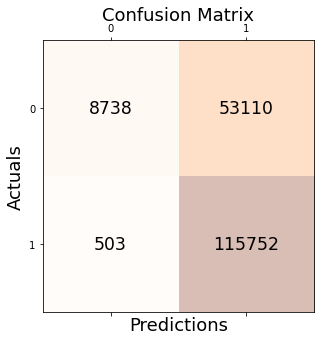

Classification report of our model

              precision    recall  f1-score   support

         0.0       0.95      0.14      0.25     61848
         1.0       0.69      1.00      0.81    116255

    accuracy                           0.70    178103
   macro avg       0.82      0.57      0.53    178103
weighted avg       0.78      0.70      0.62    178103

Informe General Del Modelo

Exactitud o Accurancy		0.69898
Precisión			0.68548
Exhaustividad o Recall		0.99567
Especificidad			0.94557
Puntuacion F1			0.81196


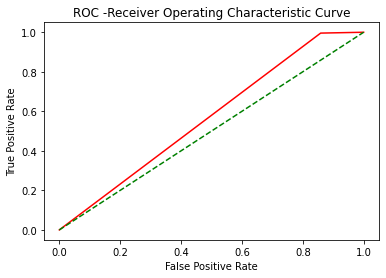

In [5]:
model = LinearRegression(copy_X= True, fit_intercept= True, normalize= True) 
model.fit(X_train, y_train) 
# Parametros Estimados Regresión Lineal
print('w = ' + str(model.coef_) + ', b = ' + str(model.intercept_))

y_pred = model.predict(X_test)
y_pred

#Convertir de continuos a binarios
def convertContinuosToBinary(x): 
    if x>0.5:
      return 1
    else:
      return 0

ypred = []
for i in y_pred:
    x = convertContinuosToBinary(i)
    ypred.append(x)

y_pred =  pd.DataFrame(ypred)

# Matriz de confusion 
conf_matrix = MatrixConfusion(y_test,y_pred)

# Reporte de Clasificación
print('Classification report of our model\n')
print(classification_report(y_test,y_pred))

#Reporte Gerenal Personalizado
reporteGeneral(conf_matrix)

#Curva Roc
CurvaRoc(y_test,y_pred)

In [25]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


corr_matrix = df_norm.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
19,V2,V1,-0.913047,0.913047
11,V1,V2,-0.913047,0.913047
54,V6,V0,0.816391,0.816391
6,V0,V6,0.816391,0.816391
78,V8,V6,-0.298813,0.298813
62,V6,V8,-0.298813,0.298813
79,V8,V7,-0.256311,0.256311
71,V7,V8,-0.256311,0.256311
8,V0,V8,-0.243701,0.243701
72,V8,V0,-0.243701,0.243701


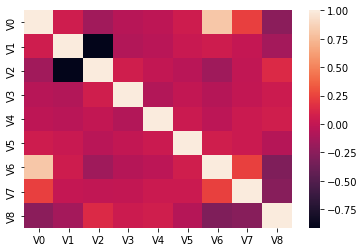

In [26]:
# Heatmap matriz de correlaciones
# ==============================================================================

heat_map = sns.heatmap(corr_matrix)
plt.show()

#Regresión Logística

**Evaluación Parametros**

In [27]:
model_params = {
    'logistic_regrssion':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    print("\n##### ", model_name," #####\n")
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

result_gridSearch_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(result_gridSearch_df)
clf.best_params_

#Guardar data normalizada en excel
print("\n!!!!! Guardando Resultados\n")
result_gridSearch_df.to_excel(r'resultadosRegresionLogistica.xlsx', index = False)


#####  logistic_regrssion  #####



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                model  best_score best_params
0  logistic_regrssion    0.908241   {'C': 10}

!!!!! Guardando Resultados



**Modelo Regresión Logistica**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


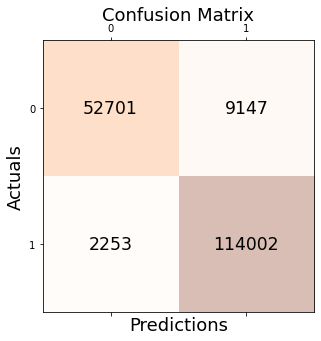

Classification report of our model

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90     61848
         1.0       0.93      0.98      0.95    116255

    accuracy                           0.94    178103
   macro avg       0.94      0.92      0.93    178103
weighted avg       0.94      0.94      0.94    178103

Informe General Del Modelo

Exactitud o Accurancy		0.93599
Precisión			0.92572
Exhaustividad o Recall		0.98062
Especificidad			0.95900
Puntuacion F1			0.95238


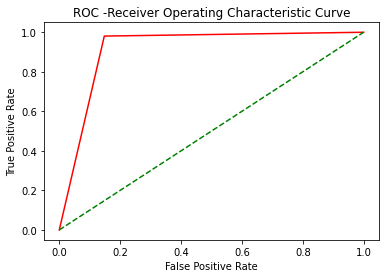

In [6]:
lr= LogisticRegression(C=10)
lr.fit(X_train, y_train)
preds_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

# Matriz de confusion 
conf_matrix = MatrixConfusion(y_test,y_pred)

# Reporte de Clasificación
print('Classification report of our model\n')
print(classification_report(y_test,y_pred))

#Reporte Gerenal Personalizado
reporteGeneral(conf_matrix)

#Curva Roc
CurvaRoc(y_test,y_pred)

#Arboles de decisión

**Evaluación Parametros**

In [35]:
model_params = {
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_depth':[5,10]
            }
        }
}

scores = []

for model_name, mp in model_params.items():
    print("\n##### ", model_name," #####\n")
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

result_gridSearch_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(result_gridSearch_df)
clf.best_params_

#Guardar data normalizada en excel
print("\n!!!!! Guardando Resultados\n")
result_gridSearch_df.to_excel(r'resultadosArbolDecision.xlsx', index = False)


#####  decision_tree  #####

           model  best_score                                        best_params
0  decision_tree    0.849001  {'criterion': 'gini', 'max_depth': 5, 'splitte...

!!!!! Guardando Resultados



**Modelo arbol de decisión**

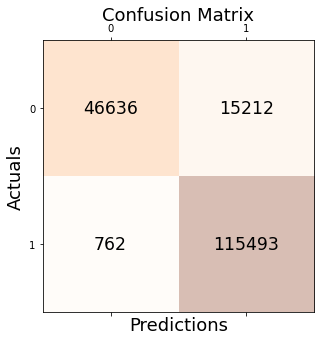

Classification report of our model

              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     61848
         1.0       0.88      0.99      0.94    116255

    accuracy                           0.91    178103
   macro avg       0.93      0.87      0.89    178103
weighted avg       0.92      0.91      0.91    178103

Informe General Del Modelo

Exactitud o Accurancy		0.91031
Precisión			0.88362
Exhaustividad o Recall		0.99345
Especificidad			0.98392
Puntuacion F1			0.93532


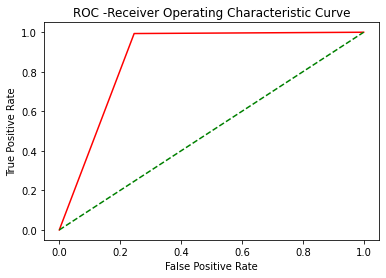

In [7]:
modelo = DecisionTreeClassifier(max_depth= 5,criterion='gini', splitter= 'random')
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

# Matriz de confusion 
conf_matrix = MatrixConfusion(y_test,y_pred)

# Reporte de Clasificación
print('Classification report of our model\n')
print(classification_report(y_test,y_pred))

#Reporte Gerenal Personalizado
reporteGeneral(conf_matrix)

#Curva Roc
CurvaRoc(y_test,y_pred)


Profundidad del árbol: 5
Número de nodos terminales: 21


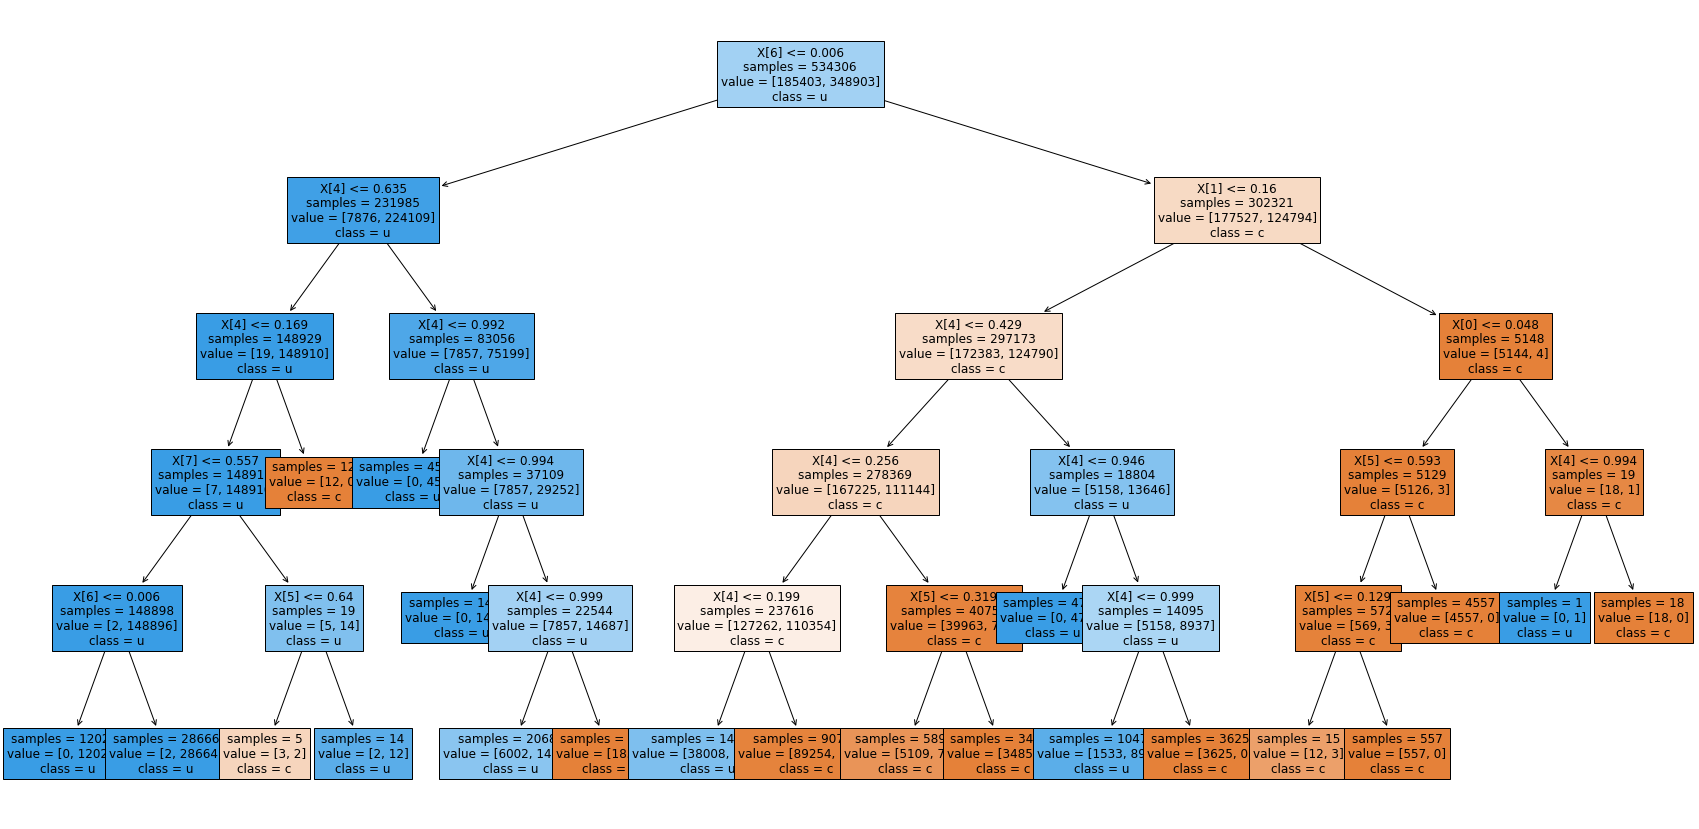

In [8]:
#Estructura del Arbol
fig, ax = plt.subplots(figsize=(30, 15))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            class_names   = 'cumple',
            filled        = True,
            impurity      = False,
            fontsize      = 12,
            ax            = ax
       )

#Máquinas de vector soporte

**Evaluación Parametros**

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C':[1,10,20],
            'kernel':.['rbf','linear']
            }
        },
}

scores = []

for model_name, mp in model_params.items():
    print("\n##### ", model_name," #####\n")
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

result_gridSearch_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(result_gridSearch_df)
clf.best_params_

#Guardar data normalizada en excel
print("\n!!!!! Guardando Resultados\n")
result_gridSearch_df.to_excel(r'resultadosMaquinasVectorSoporte.xlsx', index = False)


#####  svm  #####



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Modelo máquinas de vector soporte**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


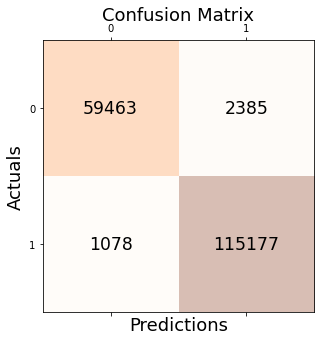

Classification report of our model

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     61848
         1.0       0.98      0.99      0.99    116255

    accuracy                           0.98    178103
   macro avg       0.98      0.98      0.98    178103
weighted avg       0.98      0.98      0.98    178103

Informe General Del Modelo

Exactitud o Accurancy		0.98056
Precisión			0.97971
Exhaustividad o Recall		0.99073
Especificidad			0.98219
Puntuacion F1			0.98519


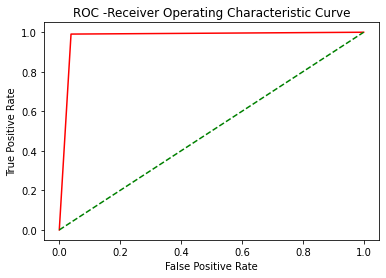

In [14]:
modelo = SVC(C = 1, kernel = 'rbf', random_state=123)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)


# Matriz de confusion 
conf_matrix = MatrixConfusion(y_test,y_pred)

# Reporte de Clasificación
print('Classification report of our model\n')
print(classification_report(y_test,y_pred))

#Reporte Gerenal Personalizado
reporteGeneral(conf_matrix)

#Curva Roc
CurvaRoc(y_test,y_pred)


#Naive Bayes (Clasificador Bayesiano Ingenuo)

**Evaluación Parametros**

In [14]:
model_params = {
     'naive_bayes_Multinomial':{
        'model': MultinomialNB(),
        'params':{           
            }
        },
    'naive_bayes_Gasuusian':{
        'model': GaussianNB(),
        'params':{                
            }
        }
}

scores = []

for model_name, mp in model_params.items():
    print("\n##### ", model_name," #####\n")
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

result_gridSearch_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(result_gridSearch_df)
clf.best_params_

#Guardar data normalizada en excel
print("\n!!!!! Guardando Resultados\n")
result_gridSearch_df.to_excel(r'resultadosNaive_bayes.xlsx', index = False)


#####  naive_bayes_Multinomial  #####



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


#####  naive_bayes_Gasuusian  #####



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

                     model  best_score best_params
0  naive_bayes_Multinomial    0.662280          {}
1    naive_bayes_Gasuusian    0.692317          {}

!!!!! Guardando Resultados



**Modelo Naive Bayes**

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


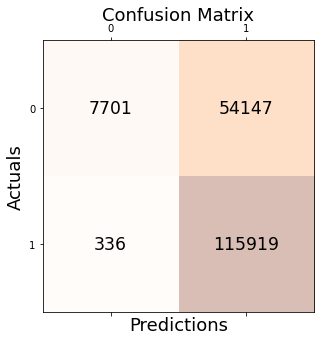

Classification report of our model

              precision    recall  f1-score   support

         0.0       0.96      0.12      0.22     61848
         1.0       0.68      1.00      0.81    116255

    accuracy                           0.69    178103
   macro avg       0.82      0.56      0.52    178103
weighted avg       0.78      0.69      0.61    178103

Informe General Del Modelo

Exactitud o Accurancy		0.69409
Precisión			0.68161
Exhaustividad o Recall		0.99711
Especificidad			0.95819
Puntuacion F1			0.80971


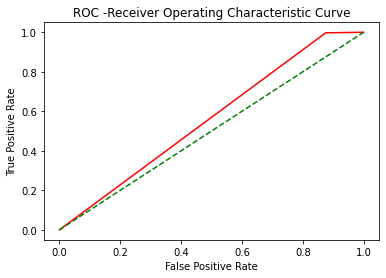

In [9]:
modelo = GaussianNB() # create a classifier
modelo.fit(X_train,y_train) # fitting the data
y_pred = modelo.predict(X_test)


# Matriz de confusion 
conf_matrix = MatrixConfusion(y_test,y_pred)

# Reporte de Clasificación
print('Classification report of our model\n')
print(classification_report(y_test,y_pred))

#Reporte Gerenal Personalizado
reporteGeneral(conf_matrix)

#Curva Roc
CurvaRoc(y_test,y_pred)

# KNN

**Evaluación Parametros**

In [ ]:
model_params = {
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
            }
        }
}

scores = []

for model_name, mp in model_params.items():
    print("\n##### ", model_name," #####\n")
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

result_gridSearch_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(result_gridSearch_df)
clf.best_params_

#Guardar data normalizada en excel
print("\n!!!!! Guardando Resultados\n")
result_gridSearch_df.to_excel(r'resultadosKnn.xlsx', index = False)

**Modelo Knn**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


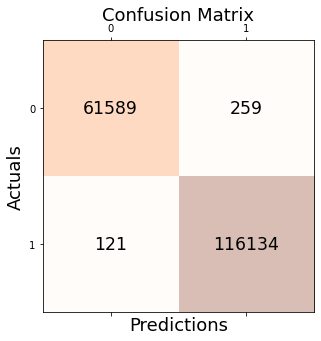

Classification report of our model

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61848
         1.0       1.00      1.00      1.00    116255

    accuracy                           1.00    178103
   macro avg       1.00      1.00      1.00    178103
weighted avg       1.00      1.00      1.00    178103

Informe General Del Modelo

Exactitud o Accurancy		0.99787
Precisión			0.99777
Exhaustividad o Recall		0.99896
Especificidad			0.99804
Puntuacion F1			0.99837


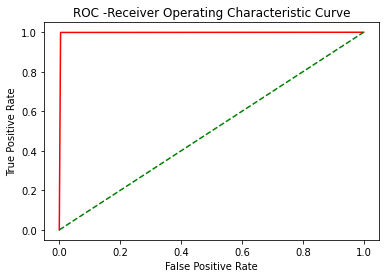

In [10]:
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train,y_train) # fitting the data
y_pred = modelo.predict(X_test)


# Matriz de confusion 
conf_matrix = MatrixConfusion(y_test,y_pred)

# Reporte de Clasificación
print('Classification report of our model\n')
print(classification_report(y_test,y_pred))

#Reporte Gerenal Personalizado
reporteGeneral(conf_matrix)

#Curva Roc
CurvaRoc(y_test,y_pred)

# K-Means

**Evaluación Parametros**

In [19]:
model_params = {
    'KMeans':{
        'model':KMeans(),
        'params':{
            'algorithm':['auto', 'full', 'elkan']
            }
        }
}

scores = []

for model_name, mp in model_params.items():
    print("\n##### ", model_name," #####\n")
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

result_gridSearch_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(result_gridSearch_df)
clf.best_params_

#Guardar data normalizada en excel
print("\n!!!!! Guardando Resultados\n")
result_gridSearch_df.to_excel(r'resultadosKmeans.xlsx', index = False)


#####  KMeans  #####

    model   best_score            best_params
0  KMeans -6733.367446  {'algorithm': 'auto'}

!!!!! Guardando Resultados



**Modelo K-Means**

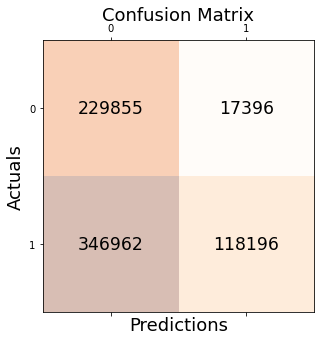

Classification report of our model

              precision    recall  f1-score   support

         0.0       0.40      0.93      0.56    247251
         1.0       0.87      0.25      0.39    465158

    accuracy                           0.49    712409
   macro avg       0.64      0.59      0.48    712409
weighted avg       0.71      0.49      0.45    712409

Informe General Del Modelo

Exactitud o Accurancy		0.48856
Precisión			0.87170
Exhaustividad o Recall		0.25410
Especificidad			0.39849
Puntuacion F1			0.39349


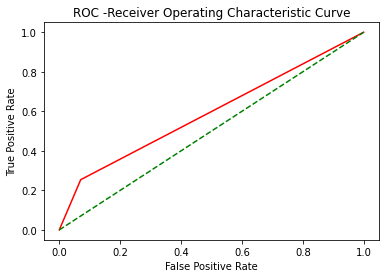

In [12]:
kmeans = KMeans(n_clusters=2,algorithm='auto') # K-Means con K=2
km = kmeans.fit(X);
y_predict = km.predict(X)
y_pred = pd.DataFrame(y_predict)

# Matriz de confusion 
conf_matrix = MatrixConfusion(Y,y_pred)

# Reporte de Clasificación
print('Classification report of our model\n')
print(classification_report(Y,y_pred))

#Reporte Gerenal Personalizado
reporteGeneral(conf_matrix)

#Curva Roc
CurvaRoc(Y,y_pred)



In [34]:
print(km.cluster_centers_)

[[9.62958061e-04 1.76516391e-04 9.89778158e-01 1.21691333e-01
  9.52991093e-01 7.80381870e-01 8.35238558e-03 6.71869388e-03]
 [1.41221034e-03 1.17740982e-02 9.88069006e-01 1.49270937e-01
  1.70760382e-01 7.50677091e-01 1.10218829e-02 6.90239121e-03]]


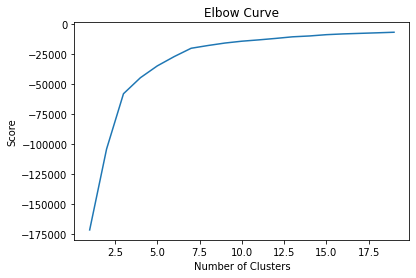

In [36]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Random Forest

**Evaluación Parametros**

In [18]:
model_params = {    
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10,20]
            }
        }
}

scores = []

for model_name, mp in model_params.items():
    print("\n##### ", model_name," #####\n")
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,Y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

result_gridSearch_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(result_gridSearch_df)
clf.best_params_

#Guardar data normalizada en excel
print("\n!!!!! Guardando Resultados\n")
result_gridSearch_df.to_excel(r'resultadosRandom_forest.xlsx', index = False)


#####  random_forest  #####



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

           model  best_score           best_params
0  random_forest    0.835475  {'n_estimators': 20}

!!!!! Guardando Resultados



**Modelo Random Forest**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


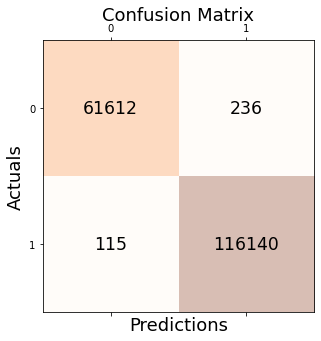

Classification report of our model

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61848
         1.0       1.00      1.00      1.00    116255

    accuracy                           1.00    178103
   macro avg       1.00      1.00      1.00    178103
weighted avg       1.00      1.00      1.00    178103

Informe General Del Modelo

Exactitud o Accurancy		0.99803
Precisión			0.99797
Exhaustividad o Recall		0.99901
Especificidad			0.99814
Puntuacion F1			0.99849


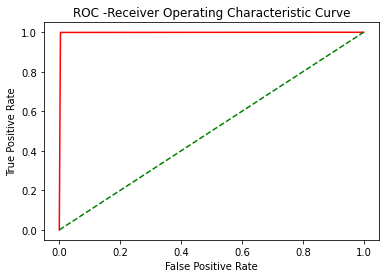

In [13]:
modelo = RandomForestClassifier(
                n_estimators= 20
             )
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)


# Matriz de confusion 
conf_matrix = MatrixConfusion(y_test,y_pred)

# Reporte de Clasificación
print('Classification report of our model\n')
print(classification_report(y_test,y_pred))

#Reporte Gerenal Personalizado
reporteGeneral(conf_matrix)

#Curva Roc
CurvaRoc(y_test,y_pred)